In [1]:
import bnn

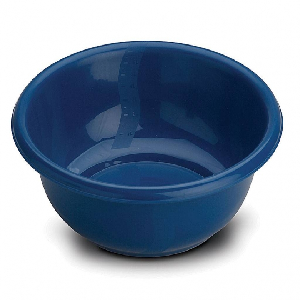

In [2]:
from PIL import Image
im=Image.open('data/bacia.jpg')
im=im.resize(size=(300,300))
im

## 1. Hardware Inference

### Case 1:

#### W1A1 - 1 bit weights and 1 activation

In [3]:
hw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW1A1,'aedes',bnn.RUNTIME_HW)
class_ranksW1A1=hw_classifier.classify_image_details(im)
inferred_class=class_ranksW1A1.argmax()
print("Inferred class: {0}".format(inferred_class))
print("Class name: {0}".format(hw_classifier.class_name(inferred_class)))

Inference took 1582.00 microseconds
Classification rate: 632.11 images per second
Inferred class: 0
Class name: Bacia


### Case 2:

#### W1A2 - 1 bit weight and 2 activation

In [4]:
hw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW1A2,'aedes',bnn.RUNTIME_HW)
class_ranksW1A2=hw_classifier.classify_image_details(im)
inferred_class=class_ranksW1A2.argmax()
print("Inferred class: {0}".format(inferred_class))
print("Class name: {0}".format(hw_classifier.class_name(inferred_class)))

Inference took 1627.00 microseconds
Classification rate: 614.63 images per second
Inferred class: 0
Class name: Bacia


### Case 3:

#### W2A2 - 2 bit weights and 2 activation

In [5]:
hw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW2A2,'aedes',bnn.RUNTIME_HW)
class_ranksW2A2=hw_classifier.classify_image_details(im)
inferred_class=class_ranksW2A2.argmax()
print("Inferred class: {0}".format(inferred_class))
print("Class name: {0}".format(hw_classifier.class_name(inferred_class)))

Inference took 4865.00 microseconds
Classification rate: 205.55 images per second
Inferred class: 0
Class name: Bacia


## 2. Summary

### Rankings

#### W1A1:

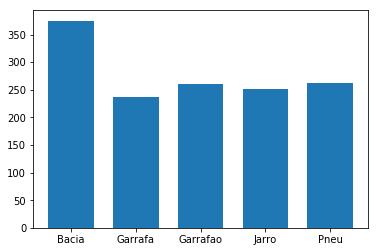

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x_pos = np.arange(len(class_ranksW1A1))
fig, ax = plt.subplots()
ax.bar(x_pos, (class_ranksW1A1), 0.7)
ax.set_xticklabels(hw_classifier.classes, rotation='horizontal')
ax.set_xticks(x_pos)
ax.set
plt.show()

#### W1A2:

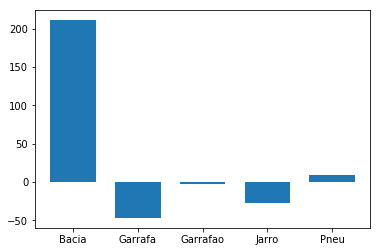

In [7]:
x_pos = np.arange(len(class_ranksW1A2))
fig, ax = plt.subplots()
ax.bar(x_pos, (class_ranksW1A2), 0.7)
ax.set_xticklabels(hw_classifier.classes, rotation='horizontal')
ax.set_xticks(x_pos)
ax.set
plt.show()

#### W2A2:

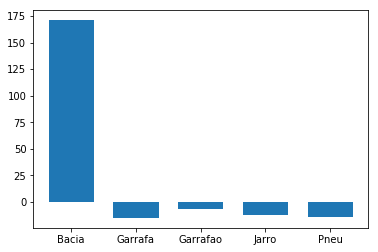

In [8]:
x_pos = np.arange(len(class_ranksW2A2))
fig, ax = plt.subplots()
ax.bar(x_pos, (class_ranksW2A2), 0.7)
ax.set_xticklabels(hw_classifier.classes, rotation='horizontal')
ax.set_xticks(x_pos)
ax.set
plt.show()

## 3. Reset the device

In [10]:
from pynq import Xlnk

xlnk = Xlnk()
xlnk.xlnk_reset()